In [383]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [384]:
df = pd.read_csv('/content/sample_data/adult (1).csv')

In [385]:
df.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [386]:
df.replace('?', np.nan, inplace=True)

In [387]:
df.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [388]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [389]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(df)

# Convert to DataFrame for better readability
encoded_df = pd.DataFrame(encoded_data, columns=df.columns)
encoded_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72.0,NaN,2649.0,11.0,8.0,6.0,NaN,1.0,4.0,0.0,0.0,91.0,39.0,38.0,0.0
1,65.0,3.0,6514.0,11.0,8.0,6.0,3.0,1.0,4.0,0.0,0.0,91.0,17.0,38.0,0.0
2,49.0,NaN,11175.0,15.0,9.0,6.0,NaN,4.0,2.0,0.0,0.0,91.0,39.0,38.0,0.0
3,37.0,3.0,7009.0,5.0,3.0,0.0,6.0,4.0,4.0,0.0,0.0,90.0,39.0,38.0,0.0
4,24.0,3.0,16850.0,15.0,9.0,5.0,9.0,3.0,4.0,0.0,0.0,90.0,39.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,5.0,3.0,18560.0,15.0,9.0,4.0,10.0,1.0,4.0,1.0,0.0,0.0,39.0,38.0,0.0
32557,10.0,3.0,16528.0,7.0,11.0,2.0,12.0,5.0,4.0,0.0,0.0,0.0,37.0,38.0,0.0
32558,23.0,3.0,8080.0,11.0,8.0,2.0,6.0,0.0,4.0,1.0,0.0,0.0,39.0,38.0,1.0
32559,41.0,3.0,7883.0,11.0,8.0,6.0,0.0,4.0,4.0,0.0,0.0,0.0,39.0,38.0,0.0


In [390]:
correlation_matrix = encoded_df.corr()
print(correlation_matrix['income'].sort_values(ascending=True))

relationship     -0.250918
marital.status   -0.199307
fnlwgt           -0.010549
workclass         0.001082
native.country    0.023179
occupation        0.050144
race              0.071846
education         0.079317
capital.loss      0.162514
sex               0.215980
hours.per.week    0.232393
age               0.234134
education.num     0.335154
capital.gain      0.340016
income            1.000000
Name: income, dtype: float64


In [391]:
df=df.drop(columns=['fnlwgt', 'marital.status', 'capital.gain', 'native.country'])
encoded_df=encoded_df.drop(columns=['fnlwgt', 'marital.status', 'capital.gain', 'native.country'])

In [392]:
df.head(20)

,age,workclass,education,education.num,occupation,relationship,race,sex,capital.loss,hours.per.week,income
0,90,NaN,HS-grad,9,NaN,Not-in-family,White,Female,4356,40,<=50K
1,82,Private,HS-grad,9,Exec-managerial,Not-in-family,White,Female,4356,18,<=50K
2,66,NaN,Some-college,10,NaN,Unmarried,Black,Female,4356,40,<=50K
3,54,Private,7th-8th,4,Machine-op-inspct,Unmarried,White,Female,3900,40,<=50K
4,41,Private,Some-college,10,Prof-specialty,Own-child,White,Female,3900,40,<=50K
5,34,Private,HS-grad,9,Other-service,Unmarried,White,Female,3770,45,<=50K
6,38,Private,10th,6,Adm-clerical,Unmarried,White,Male,3770,40,<=50K
7,74,State-gov,Doctorate,16,Prof-specialty,Other-relative,White,Female,3683,20,>50K
8,68,Federal-gov,HS-grad,9,Prof-specialty,Not-in-family,White,Female,3683,40,<=50K
9,41,Private,Some-college,10,Craft-repair,Unmarried,White,Male,3004,60,>50K


In [393]:
df.isnull().sum()

,0
age,0
workclass,1836
education,0
education.num,0
occupation,1843
relationship,0
race,0
sex,0
capital.loss,0
hours.per.week,0


In [394]:
encoded_df.isnull().sum()

,0
age,0
workclass,1836
education,0
education.num,0
occupation,1843
relationship,0
race,0
sex,0
capital.loss,0
hours.per.week,0


In [395]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(encoded_df[['workclass', 'occupation']])

In [396]:
from sklearn.impute import SimpleImputer, KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
encoded_df[['workclass', 'occupation']] = scaler.inverse_transform(imputed_data)

In [397]:
encoded_df.head(20)

,age,workclass,education,education.num,occupation,relationship,race,sex,capital.loss,hours.per.week,income
0,72.0,3.100081,11.0,8.0,5.967088,1.0,4.0,0.0,91.0,39.0,0.0
1,65.0,3.000000,11.0,8.0,3.000000,1.0,4.0,0.0,91.0,17.0,0.0
2,49.0,3.100081,15.0,9.0,5.967088,4.0,2.0,0.0,91.0,39.0,0.0
3,37.0,3.000000,5.0,3.0,6.000000,4.0,4.0,0.0,90.0,39.0,0.0
4,24.0,3.000000,15.0,9.0,9.000000,3.0,4.0,0.0,90.0,39.0,0.0
5,17.0,3.000000,11.0,8.0,7.000000,4.0,4.0,0.0,89.0,44.0,0.0
6,21.0,3.000000,0.0,5.0,0.000000,4.0,4.0,1.0,89.0,39.0,0.0
7,57.0,6.000000,10.0,15.0,9.000000,2.0,4.0,0.0,88.0,19.0,1.0
8,51.0,0.000000,11.0,8.0,9.000000,1.0,4.0,0.0,88.0,39.0,0.0
9,24.0,3.000000,15.0,9.0,2.000000,4.0,4.0,1.0,87.0,59.0,1.0


In [398]:
encoded_df['income'].value_counts()

,count
income,
0.0,24720
1.0,7841


In [399]:
df['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


In [400]:
## 7
correlation_matrix = encoded_df.corr()
print(correlation_matrix['income'].sort_values(ascending=True))

relationship     -0.250918
workclass         0.001063
occupation        0.049302
race              0.071846
education         0.079317
capital.loss      0.162514
sex               0.215980
hours.per.week    0.232393
age               0.234134
education.num     0.335154
income            1.000000
Name: income, dtype: float64


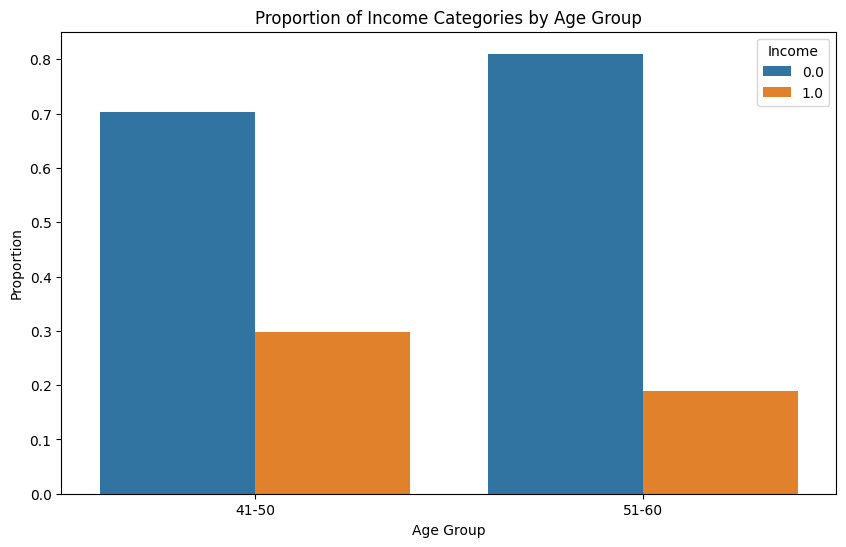

In [401]:
combined_df = pd.concat([
    encoded_df[(encoded_df['age'] >= 41) & (encoded_df['age'] <= 50)].assign(age_group='41-50'),
    encoded_df[(encoded_df['age'] >= 51) & (encoded_df['age'] <= 60)].assign(age_group='51-60')
])

# Calculate proportions for each income category
proportions = combined_df.groupby(['age_group', 'income']).size().reset_index(name='count')
proportions['proportion'] = proportions['count'] / proportions.groupby('age_group')['count'].transform('sum')

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='proportion', hue='income', data=proportions)
plt.title('Proportion of Income Categories by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

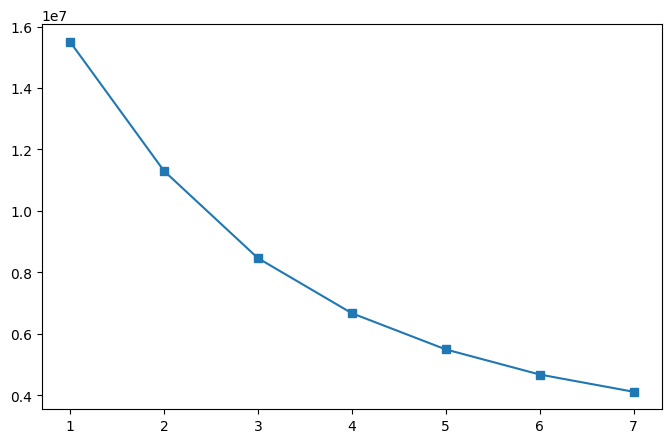

In [402]:
from sklearn.cluster import KMeans
X=encoded_df.drop(columns=['income'])
inertia = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)  # Ensure X is your feature dataset
    inertia.append(kmeans.inertia_)

# Plotting the inertia for different numbers of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), inertia, marker='s')
plt.show()




In [403]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.neighbors import kneighbors_graph


In [404]:
connectivity = kneighbors_graph(X,n_neighbors=15)

In [405]:
model = AgglomerativeClustering(n_clusters=3,connectivity=connectivity)


In [406]:
model.fit(X)


AgglomerativeClustering(connectivity=<32561x32561 sparse matrix of type '<class 'numpy.float64'>'
	with 488415 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)

In [407]:
clusters= model.labels_


In [408]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_shown = pca.fit_transform(X)


In [409]:
type(clusters)
set(clusters)


{0, 1, 2}

In [410]:
clusters==1


array([False, False, False, ..., False, False,  True])

In [411]:
x_shown[clusters==0,0]


array([29.02337829, 15.36648221, 24.95573873, ..., 13.50246888,
        1.0449746 , 18.03144572])

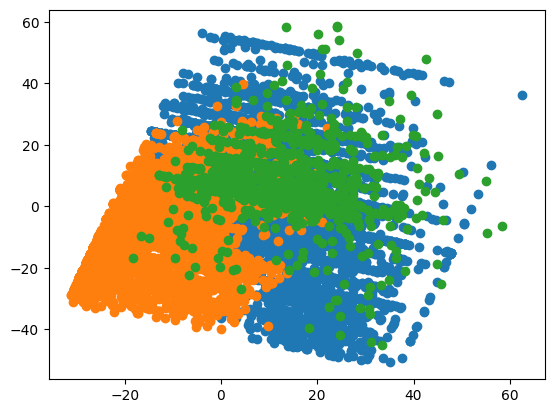

In [412]:

for i in range(0,3):
  plt.scatter(x_shown[clusters==i,0],x_shown[clusters==i,1],label=i)

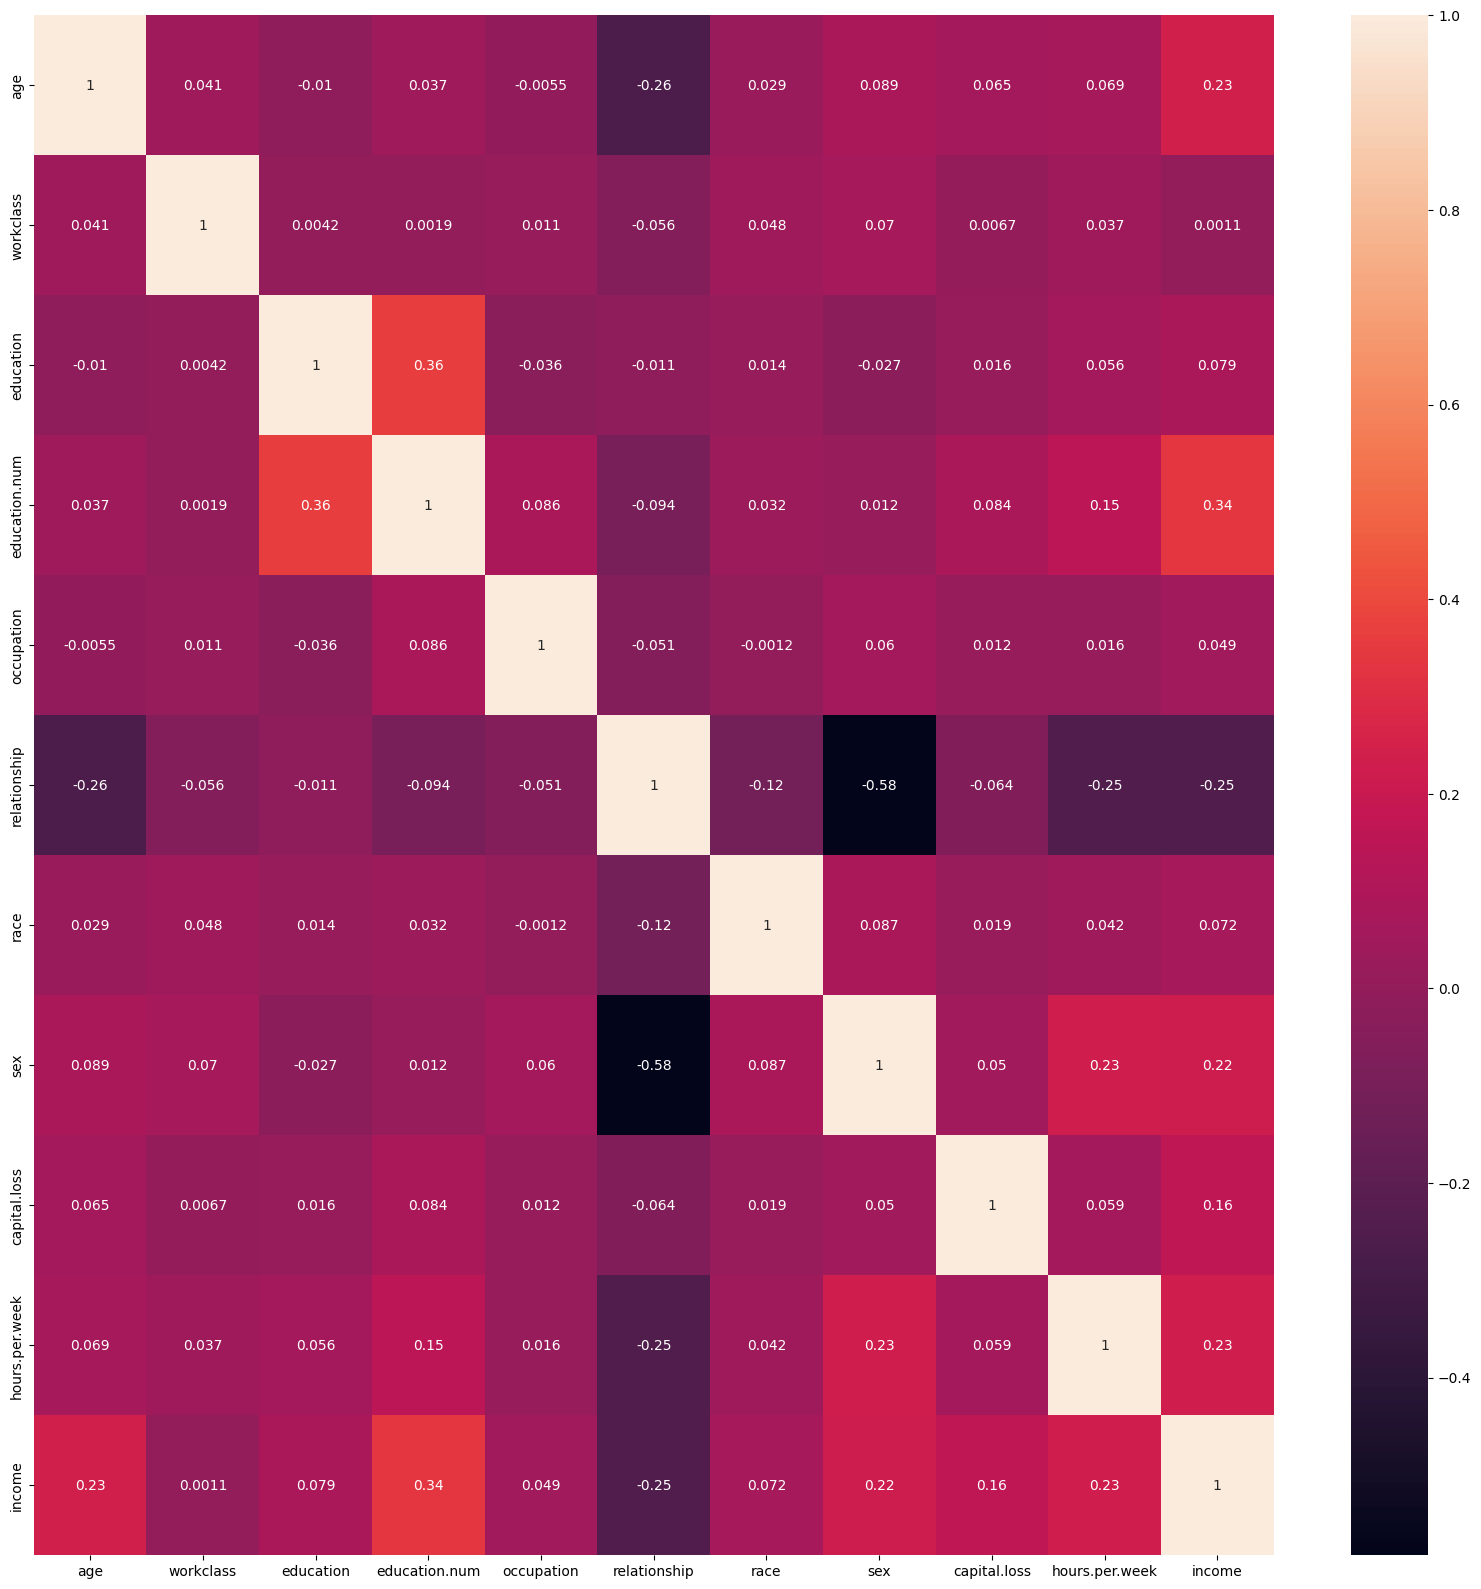

In [414]:
plt.figure(figsize=(20, 20))
sns.heatmap(encoded_df.corr(), annot=True)
plt.show()